In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
from numpy.linalg import eigh # eigh for symmetric matrices
import seaborn as sns

In [7]:
dataset = pd.read_csv('wine.csv') #from kaggle
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [8]:
dataset.shape

(178, 14)

In [9]:
dataset.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [10]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

type(X)
type(y)
print(type(np.unique(y)))
print("Classes:", np.unique(y))

<class 'numpy.ndarray'>
Classes: [1 2 3]


In [11]:
dataset.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


### Split and Standardize the data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Learn AND apply
X_test_scaled = scaler.transform(X_test) # Just Apply

In [14]:
X_full_scaled = scaler.fit_transform(X) # For visualization

In [15]:
print(f"\nBefore standardization - Feature 0 (Alcohol):")
print(f"  Mean: {X_train[:, 0].mean():.2f}, Std: {X_train[:, 0].std():.2f}")
print(f"After standardization - Feature 0 (Alcohol):")
print(f"  Mean: {X_train_scaled[:, 0].mean():.2f}, Std: {X_train_scaled[:, 0].std():.2f}")
#formula: z = (x - mean) / standard_deviation


Before standardization - Feature 0 (Alcohol):
  Mean: 12.98, Std: 0.80
After standardization - Feature 0 (Alcohol):
  Mean: 0.00, Std: 1.00


In [16]:
df_full_scaled_std = pd.DataFrame(X_full_scaled)
df_full_scaled_std.columns = ["Alcohol", "Malic Acid", "Ash", "Ash_Alcanity", "Magnesium", "Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols", "Proanthocyanins", "Color_Intensity", "Hue", "OD280", "Proline"]
df_full_scaled_std.head()

,Alcohol,Malic Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [17]:
product = X_full_scaled[:, 0] * X_full_scaled[:, 1]
print(product)

[-0.85383959 -0.12300033  0.00417999 -0.58664742  0.0673291  -0.76650692
 -0.71846498 -0.21890294 -1.41255203 -0.93991827 -0.21497773 -1.0629242
 -0.50384733 -1.17619777 -0.71329387 -0.36733397 -0.59988387 -0.70478125
 -0.98432031  0.54141372 -0.82974574 -0.11461106 -0.37469537  0.12297976
 -0.29146047 -0.01567967 -0.2445305  -0.20460934 -0.42064669 -0.74189913
 -0.67641894 -0.43451918 -0.3814494  -0.67897927 -0.30294518 -0.27978762
 -0.21572402 -0.03758261 -0.06434394  2.23592558 -0.38850619  0.68257367
 -0.43523619  0.43628958 -0.03101173  2.28464031  1.91749822 -0.65456397
 -0.38564497 -0.63159392 -0.03320202 -0.63120831 -0.5327404  -0.37226213
 -0.54631574 -0.37610075 -0.86041546 -0.1175545  -0.72298324  0.97641318
  0.91936836  0.39041426 -0.80633713  0.84355342  0.8163554   0.78761246
 -0.16087074  0.81558294 -0.52547991  1.00497857  0.57234072 -0.78744989
 -0.36702187  0.00784543  1.43815029  0.67838308 -0.04679667 -0.7125239
  1.00116611 -0.51122867  1.57149097  0.16378052  1.2

In [18]:
summ = product.sum()
print(f"{summ:.2f}")

16.80


In [19]:
final = summ/177
print(final)

0.09493025696075534


In [20]:
df_full_scaled_std.shape

(178, 13)

### Find the covariance matrix of the data

In [21]:
#formula:
covariance = np.cov(X_full_scaled,rowvar=False)
df_covariance = pd.DataFrame(covariance)
df_covariance.columns = ["Alcohol", "Malic Acid", "Ash", "Ash_Alcanity", "Magnesium", "Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols", "Proanthocyanins", "Color_Intensity", "Hue", "OD280", "Proline"]
df_covariance.index = ["Alcohol", "Malic Acid", "Ash", "Ash_Alcanity", "Magnesium", "Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols", "Proanthocyanins", "Color_Intensity", "Hue", "OD280", "Proline"]
df_covariance

,Alcohol,Malic Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.005650,0.094930,0.212740,-0.311988,0.272328,0.290734,0.238153,-0.156810,0.137470,0.549451,-0.072153,0.072752,0.647357
Malic Acid,0.094930,1.005650,0.164972,0.290130,-0.054883,-0.337061,-0.413329,0.294632,-0.221993,0.250392,-0.564467,-0.370794,-0.193095
Ash,0.212740,0.164972,1.005650,0.445872,0.288206,0.129708,0.115727,0.187283,0.009706,0.260350,-0.075089,0.003933,0.224890
Ash_Alcanity,-0.311988,0.290130,0.445872,1.005650,-0.083804,-0.322928,-0.353355,0.363966,-0.198442,0.018838,-0.275503,-0.278332,-0.443086
Magnesium,0.272328,-0.054883,0.288206,-0.083804,1.005650,0.215613,0.196890,-0.257742,0.237776,0.201080,0.055711,0.066377,0.395573
Total_Phenols,0.290734,-0.337061,0.129708,-0.322928,0.215613,1.005650,0.869448,-0.452477,0.615873,-0.055448,0.436132,0.703904,0.500929
Flavanoids,0.238153,-0.413329,0.115727,-0.353355,0.196890,0.869448,1.005650,-0.540939,0.656379,-0.173353,0.546549,0.791641,0.496985
Nonflavanoid_Phenols,-0.156810,0.294632,0.187283,0.363966,-0.257742,-0.452477,-0.540939,1.005650,-0.367912,0.139843,-0.264123,-0.506113,-0.313144
Proanthocyanins,0.137470,-0.221993,0.009706,-0.198442,0.237776,0.615873,0.656379,-0.367912,1.005650,-0.025393,0.297214,0.522000,0.332283
Color_Intensity,0.549451,0.250392,0.260350,0.018838,0.201080,-0.055448,-0.173353,0.139843,-0.025393,1.005650,-0.524761,-0.431238,0.317886


In [22]:
df_covariance.shape

(13, 13)

### Eigendecomposition

In [23]:
eigvals, eigvecs = eigh(covariance)

eigvals

array([0.10396199, 0.16972374, 0.22706428, 0.25232001, 0.29051203,
       0.35046627, 0.55414147, 0.64528221, 0.85804868, 0.92416587,
       1.45424187, 2.51108093, 4.73243698])

In [24]:
eigvecs

array([[-0.01496997,  0.26628645,  0.22591696,  0.21160473,  0.50861912,
        -0.39613926,  0.05639636, -0.21353865, -0.26566365,  0.0178563 ,
        -0.20738262, -0.48365155, -0.1443294 ],
       [-0.02596375, -0.12169604, -0.07648554, -0.30907994, -0.07528304,
        -0.06582674, -0.42052391, -0.53681385,  0.03521363, -0.53689028,
         0.08901289, -0.22493093,  0.24518758],
       [ 0.14121803,  0.04962237,  0.49869142, -0.02712539, -0.30769445,
         0.17026002,  0.14917061, -0.15447466, -0.14302547,  0.21417556,
         0.6262239 , -0.31606881,  0.00205106],
       [-0.09168285,  0.05574287, -0.47931378,  0.05279942,  0.20044931,
        -0.42797018,  0.28696914,  0.10082451,  0.06610294, -0.06085941,
         0.61208035,  0.0105905 ,  0.23932041],
       [-0.05677422, -0.06222011, -0.07128891,  0.06787022,  0.27140257,
         0.15636143, -0.3228833 , -0.03814394,  0.72704851,  0.35179658,
         0.13075693, -0.299634  , -0.14199204],
       [ 0.46390791,  0.303882

In [28]:
sorted_idx = np.argsort(eigvals)[::-1]  # biggest to smallest
eigvals = eigvals[sorted_idx]
eigvecs = eigvecs[:, sorted_idx]

In [36]:
num_components = 2
principal_components = eigvecs[:, :num_components]
df_principal_components = pd.DataFrame(principal_components)
df_principal_components

,0,1
0,-0.144329,-0.483652
1,0.245188,-0.224931
2,0.002051,-0.316069
3,0.239320,0.010591
4,-0.141992,-0.299634
5,-0.394661,-0.065040
6,-0.422934,0.003360
7,0.298533,-0.028779
8,-0.313429,-0.039302
9,0.088617,-0.529996


In [41]:
sum_principal_components = df_principal_components.iloc[0, 0].sum()
print(f"{sum_principal_components:.2f}")

-0.14


In [34]:
X_pca_manual = X_full_scaled.dot(principal_components)

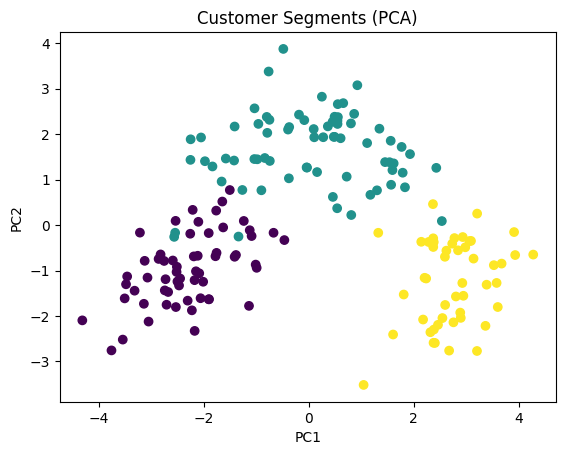

In [43]:
plt.scatter(X_pca_manual[:, 0], X_pca_manual[:, 1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Segments (PCA)")
plt.show()

In [33]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [34]:
X_train_pca.shape

(142, 2)

In [52]:
X_test_pca.shape
data_frame_pca_test = pd.DataFrame(X_test_pca)
data_frame_pca_train = pd.DataFrame(X_train_pca)
data_frame_pca_test.head()

,0,1
0,2.206852,1.028501
1,-2.536520,1.836442
2,2.191833,-1.812405
3,2.514893,1.389078
4,-0.347991,-0.525398


In [53]:
data_frame_pca_train.head()

,0,1
0,-2.178845,1.072185
1,-1.808192,-1.578223
2,1.098295,-2.221243
3,-2.555847,1.662104
4,1.856981,-0.241573


In [54]:
data_frame_pca_train.describe()

,0,1
count,1.420000e+02,1.420000e+02
mean,-5.003822e-17,3.127389e-17
std,2.197485e+00,1.590347e+00
min,-3.844170e+00,-3.809075e+00
25%,-2.280169e+00,-1.355095e+00
50%,3.230706e-02,2.429433e-01
75%,1.970072e+00,1.301042e+00
max,4.354131e+00,3.539066e+00


In [36]:
print(f"\nOriginal dimensions: {X_train.shape[1]} features")
print(f"Reduced dimensions: {X_train_pca.shape[1]} principal components")
print(f"Dimensionality reduction: {((1 - X_train_pca.shape[1]/X_train.shape[1]) * 100):.1f}%")


Original dimensions: 13 features
Reduced dimensions: 2 principal components
Dimensionality reduction: 84.6%


In [37]:
print(f"\nExplained Variance by each PC:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"  Total variance captured: {sum(pca.explained_variance_ratio_):.4f} ({sum(pca.explained_variance_ratio_)*100:.2f}%)")


Explained Variance by each PC:
  PC1: 0.3688 (36.88%)
  PC2: 0.1932 (19.32%)
  Total variance captured: 0.5620 (56.20%)


In [38]:
print(f"\nInterpretation: Using only 2 components, we retain {sum(pca.explained_variance_ratio_)*100:.1f}% of information!")


Interpretation: Using only 2 components, we retain 56.2% of information!


In [39]:
pca_vis = PCA(n_components=2)
X_pca_full = pca_vis.fit_transform(X_full_scaled)   # For Visualization!
X_pca_full.shape

(178, 2)

In [40]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_pca, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
# Predict
y_pred = classifier.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9722222222222222



Confusion Matrix:
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]

Interpretation:
  - Diagonal elements: Correct predictions
  - Off-diagonal elements: Misclassifications


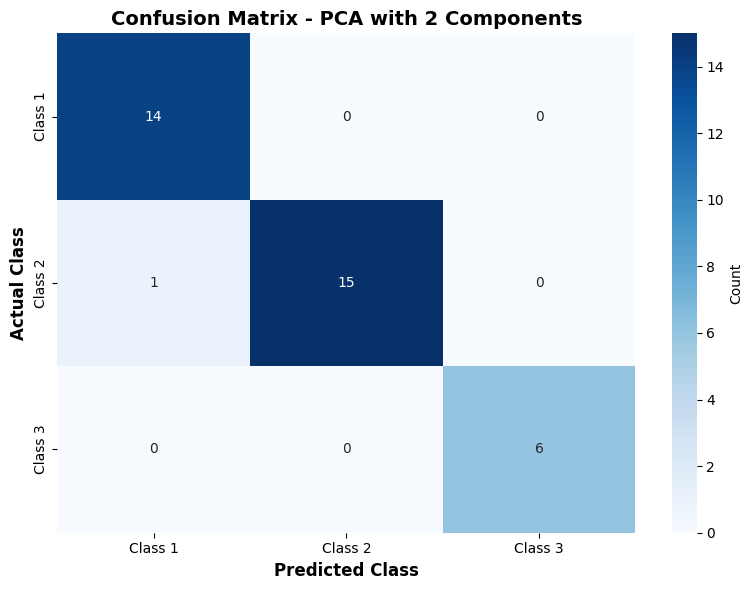

In [42]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print("\nInterpretation:")
print("  - Diagonal elements: Correct predictions")
print("  - Off-diagonal elements: Misclassifications")

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 1', 'Class 2', 'Class 3'], 
            yticklabels=['Class 1', 'Class 2', 'Class 3'],
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Class', fontsize=12, fontweight='bold')
plt.ylabel('Actual Class', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - PCA with 2 Components', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [43]:
"""X_scaled = scaler.fit_transform(X)
pca_vis = PCA(n_components=2)
X_pca = pca_vis.fit_transform(X_scaled)"""

'X_scaled = scaler.fit_transform(X)\npca_vis = PCA(n_components=2)\nX_pca = pca_vis.fit_transform(X_scaled)'

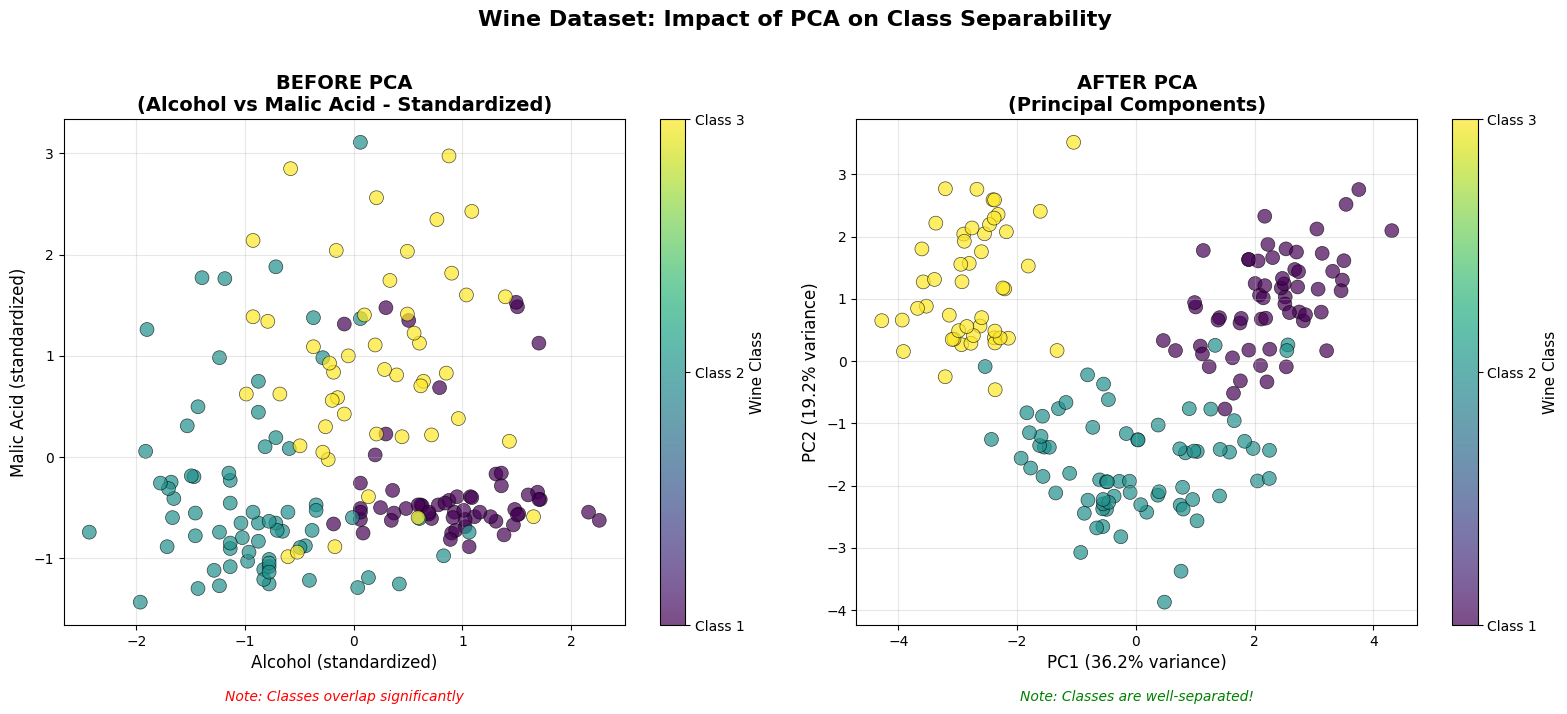

In [134]:
plt.figure(figsize=(16, 7))

# BEFORE PCA: Plot first 2 original features
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_full_scaled[:, 0],  # Feature 0: Alcohol
                       X_full_scaled[:, 1],  # Feature 1: Malic Acid
                       c=y, cmap='viridis', edgecolor='black', 
                       s=100, alpha=0.7, linewidth=0.5)
plt.title('BEFORE PCA\n(Alcohol vs Malic Acid - Standardized)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Alcohol (standardized)', fontsize=12)
plt.ylabel('Malic Acid (standardized)', fontsize=12)
plt.grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ticks=[1, 2, 3])
cbar1.set_label('Wine Class', fontsize=11)
cbar1.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])

plt.text(0.5, -0.15, 'Note: Classes overlap significantly', 
         transform=plt.gca().transAxes, ha='center', 
         fontsize=10, style='italic', color='red')

# AFTER PCA: Plot principal components
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_pca_full[:, 0],  # PC1
                       X_pca_full[:, 1],  # PC2
                       c=y, cmap='viridis', edgecolor='black', 
                       s=100, alpha=0.7, linewidth=0.5)
plt.title('AFTER PCA\n(Principal Components)', 
          fontsize=14, fontweight='bold')
plt.xlabel(f'PC1 ({pca_vis.explained_variance_ratio_[0]*100:.1f}% variance)', 
           fontsize=12)
plt.ylabel(f'PC2 ({pca_vis.explained_variance_ratio_[1]*100:.1f}% variance)', 
           fontsize=12)
plt.grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ticks=[1, 2, 3])
cbar2.set_label('Wine Class', fontsize=11)
cbar2.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])

plt.text(0.5, -0.15, 'Note: Classes are well-separated!', 
         transform=plt.gca().transAxes, ha='center', 
         fontsize=10, style='italic', color='green')

plt.suptitle('Wine Dataset: Impact of PCA on Class Separability', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Total possible components: 13

Variance explained by each component:
  PC1: 0.3688 (36.88%)
  PC2: 0.1932 (19.32%)
  PC3: 0.1075 (10.75%)
  PC4: 0.0742 (7.42%)
  PC5: 0.0625 (6.25%)
  PC6: 0.0491 (4.91%)
  PC7: 0.0412 (4.12%)
  PC8: 0.0250 (2.50%)
  PC9: 0.0231 (2.31%)
  PC10: 0.0186 (1.86%)
  PC11: 0.0173 (1.73%)
  PC12: 0.0125 (1.25%)
  PC13: 0.0070 (0.70%)

Cumulative variance explained:
  First 1 components: 0.3688 (36.88%)
  First 2 components: 0.5620 (56.20%)
  First 3 components: 0.6696 (66.96%)
  First 4 components: 0.7438 (74.38%)
  First 5 components: 0.8062 (80.62%)
  First 6 components: 0.8553 (85.53%)
  First 7 components: 0.8965 (89.65%)
  First 8 components: 0.9215 (92.15%)
  First 9 components: 0.9445 (94.45%)
  First 10 components: 0.9632 (96.32%)
  First 11 components: 0.9805 (98.05%)
  First 12 components: 0.9930 (99.30%)
  First 13 components: 1.0000 (100.00%)

👉 Components needed for 95% variance: 10
   Dimensionality reduction: 13 → 10 features


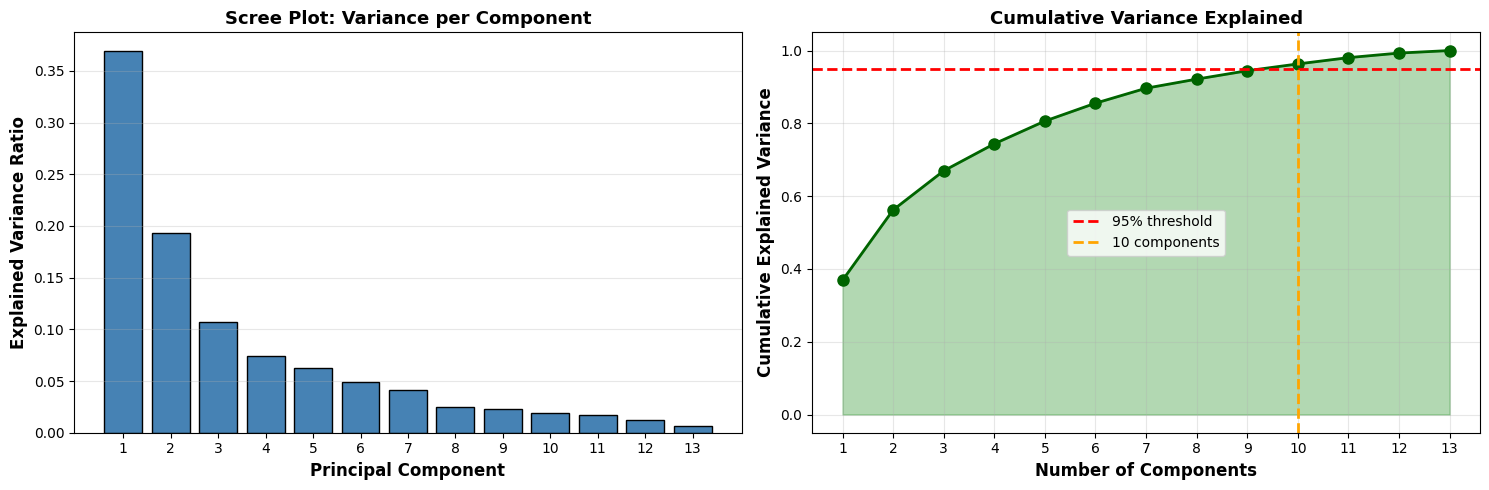

In [45]:
pca_full = PCA()
pca_full.fit(X_train_scaled)

print(f"Total possible components: {len(pca_full.explained_variance_ratio_)}")
print("\nVariance explained by each component:")
for i, var in enumerate(pca_full.explained_variance_ratio_, 1):
    print(f"  PC{i}: {var:.4f} ({var*100:.2f}%)")

# Cumulative variance
cumsum = np.cumsum(pca_full.explained_variance_ratio_)
print("\nCumulative variance explained:")
for i, cum_var in enumerate(cumsum, 1):
    print(f"  First {i} components: {cum_var:.4f} ({cum_var*100:.2f}%)")

# Find components for 95% variance
n_components_95 = np.argmax(cumsum >= 0.95) + 1
print(f"\n👉 Components needed for 95% variance: {n_components_95}")
print(f"   Dimensionality reduction: {13} → {n_components_95} features")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
axes[0].bar(range(1, len(pca_full.explained_variance_ratio_) + 1), 
            pca_full.explained_variance_ratio_, 
            color='steelblue', edgecolor='black')
axes[0].set_xlabel('Principal Component', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12, fontweight='bold')
axes[0].set_title('Scree Plot: Variance per Component', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_xticks(range(1, 14))

# Cumulative variance plot
axes[1].plot(range(1, len(cumsum) + 1), cumsum, 
             marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[1].axhline(y=0.95, color='red', linestyle='--', 
                linewidth=2, label='95% threshold')
axes[1].axvline(x=n_components_95, color='orange', linestyle='--', 
                linewidth=2, label=f'{n_components_95} components')
axes[1].fill_between(range(1, len(cumsum) + 1), cumsum, alpha=0.3, color='green')
axes[1].set_xlabel('Number of Components', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12, fontweight='bold')
axes[1].set_title('Cumulative Variance Explained', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, 14))

plt.tight_layout()
plt.show()